# Preparation for Experiment

## Task 2.1. Output signal of the PLL

![image](PLL_blog_diagramm2.png)


### 1. Stabilize the VCO signal at an arbitrary but fixed frequency:
The Voltage Controlled Oscillator (VCO) is regulated to a stable, fixed frequency, even in the presence of external disturbances or supply voltage variations. It operates within a feedback loop.
The PLL compares the output frequency of the VCO with a stable reference frequency, such as that from a crystal oscillator.
The phase difference is filtered and used to adjust the VCO to match the reference.
Once locked, the VCO is stabilized to a fixed frequency determined by the reference.
The output signal is taken directly from the VCO — this is the stabilized oscillator output.

### 2. Synthesize signals of different frequencies:
The PLL is used to generate a variable but precisely defined output frequency — for example, an integer multiple of the reference frequency or a programmable value.
A frequency divider is placed in the feedback loop to reduce the VCO output frequency before it is compared to the reference.
For example, if the division factor is N, the PLL adjusts the VCO so that f_VCO / N = f_ref, which means the VCO runs at f_VCO = N × f_ref.
By selecting different values of N (often digitally controlled), various frequencies can be synthesized.
The output signal is taken directly from the VCO — it is a multiple of the reference frequency.

### 3. How FM Demodulation with PLL works:
In frequency modulation (FM), the frequency of a carrier signal is varied according to the input signal.
A PLL can track these frequency variations and recover the encoded information.
It compares the phase of the FM input signal to the phase of the VCO output.
Since frequency is the derivative of phase, the phase difference corresponds directly to frequency deviation.
This phase error is integrated by the loop filter, effectively converting frequency changes into a proportional voltage.
Thus, the instantaneous frequency deviation of the FM signal results in a corresponding voltage variation at the output.
The demodulated signal is taken directly from the output of the loop filter.



### 2.2.1 XOR Circuit

In digital technology, the phase detector can be implemented by an XOR circuit, such as in
the case of NXP’s HEF4046BT PLL IC from the first experiment portion.

#### 1.- Draw starting from two equal-frequency, phase-shifted square-wave signals uR(t) and uV(t), plot the output voltage of the phase detector uD(t) at a phase shift of Φ = ϕR−ϕV = 0◦, 90◦, -90◦.

To generate the plots, the digital circuits where simulated in Simulink. The plot for the XOR output where there is no phase difference is:

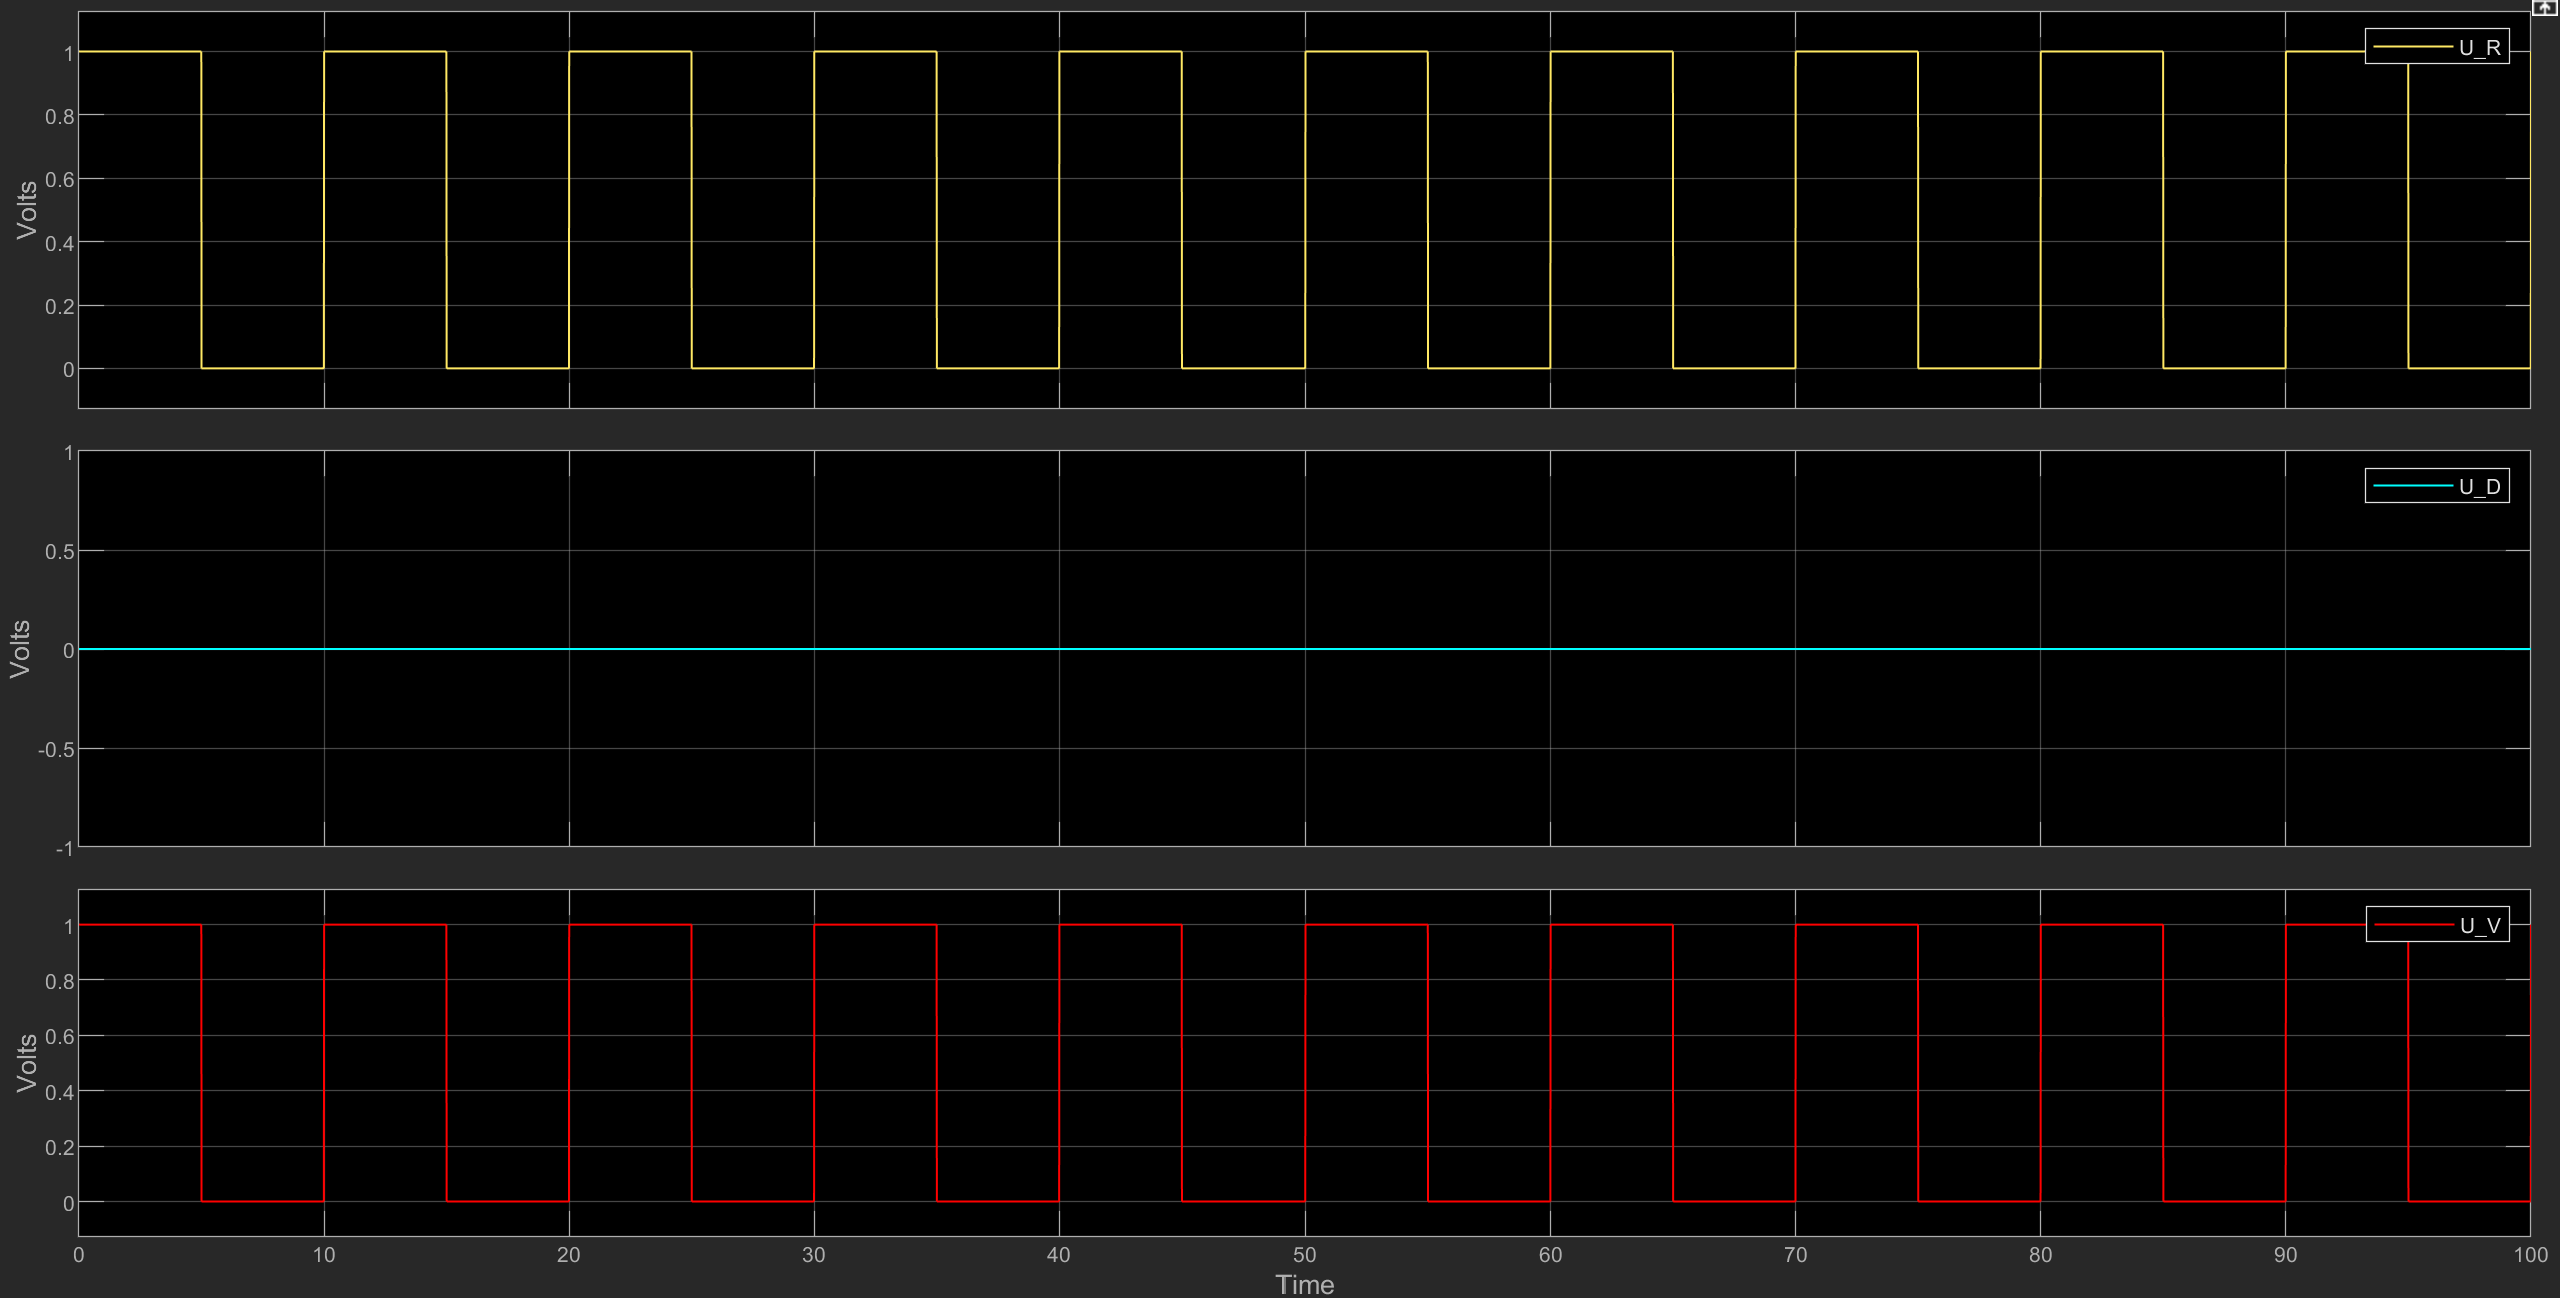

The plot for the XOR output where there is a 90º phase difference is:

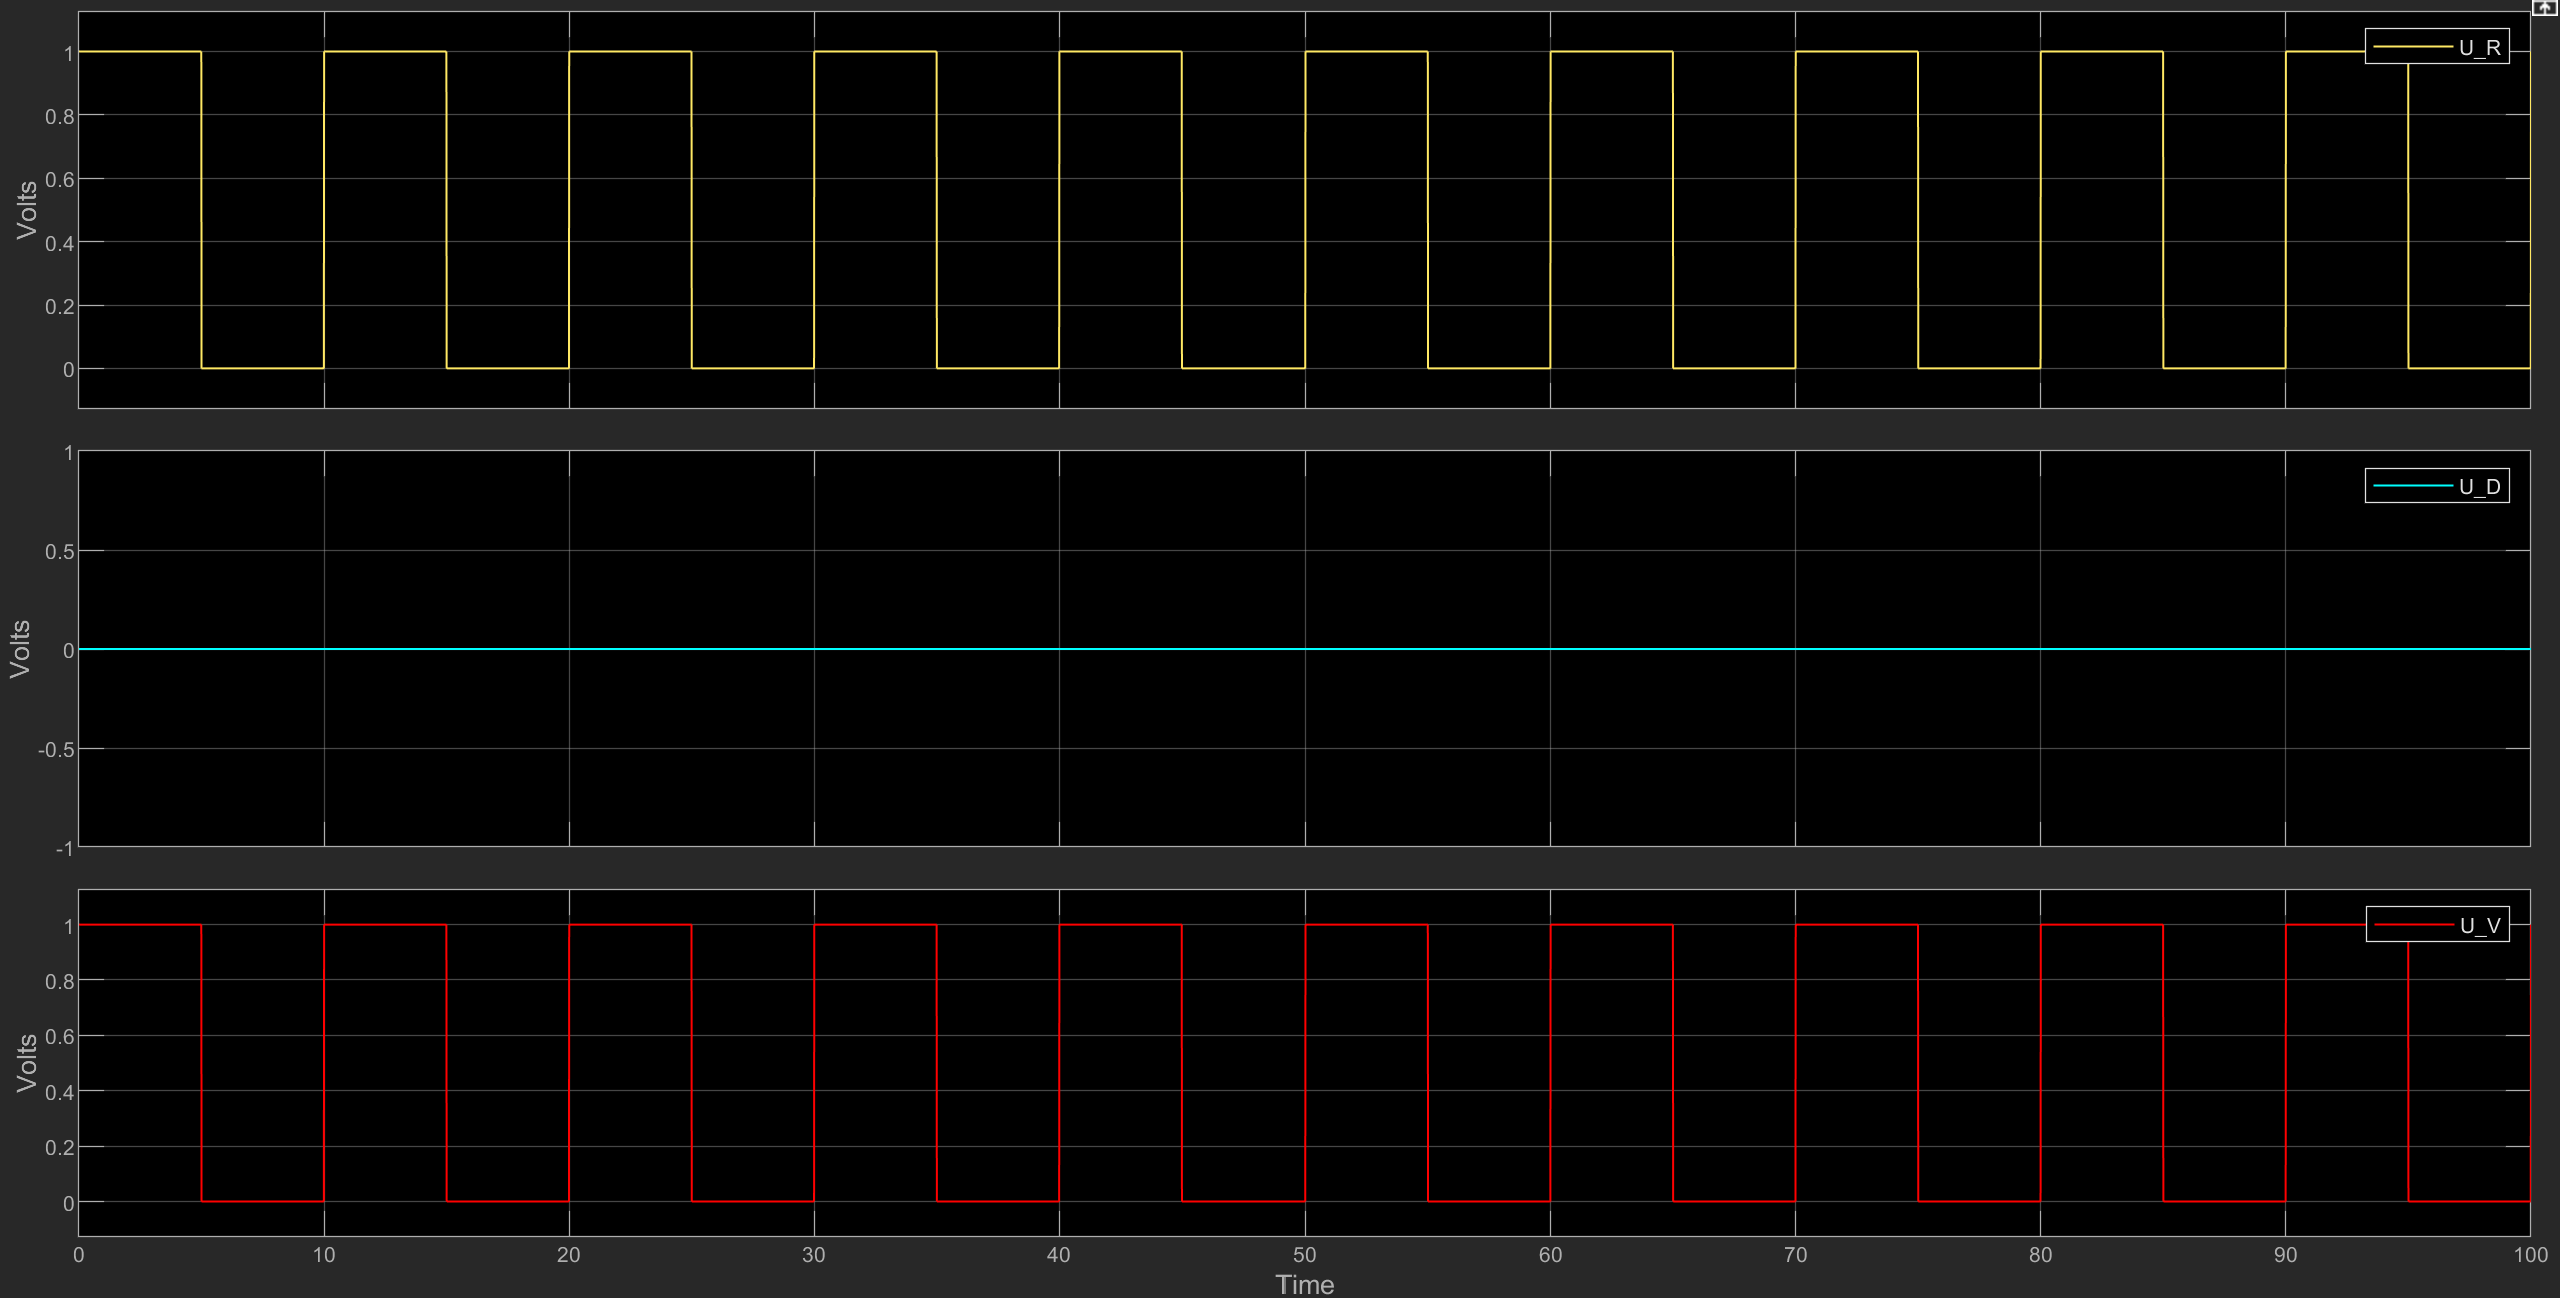

The plot for the XOR output where there is a -90º phase difference is:

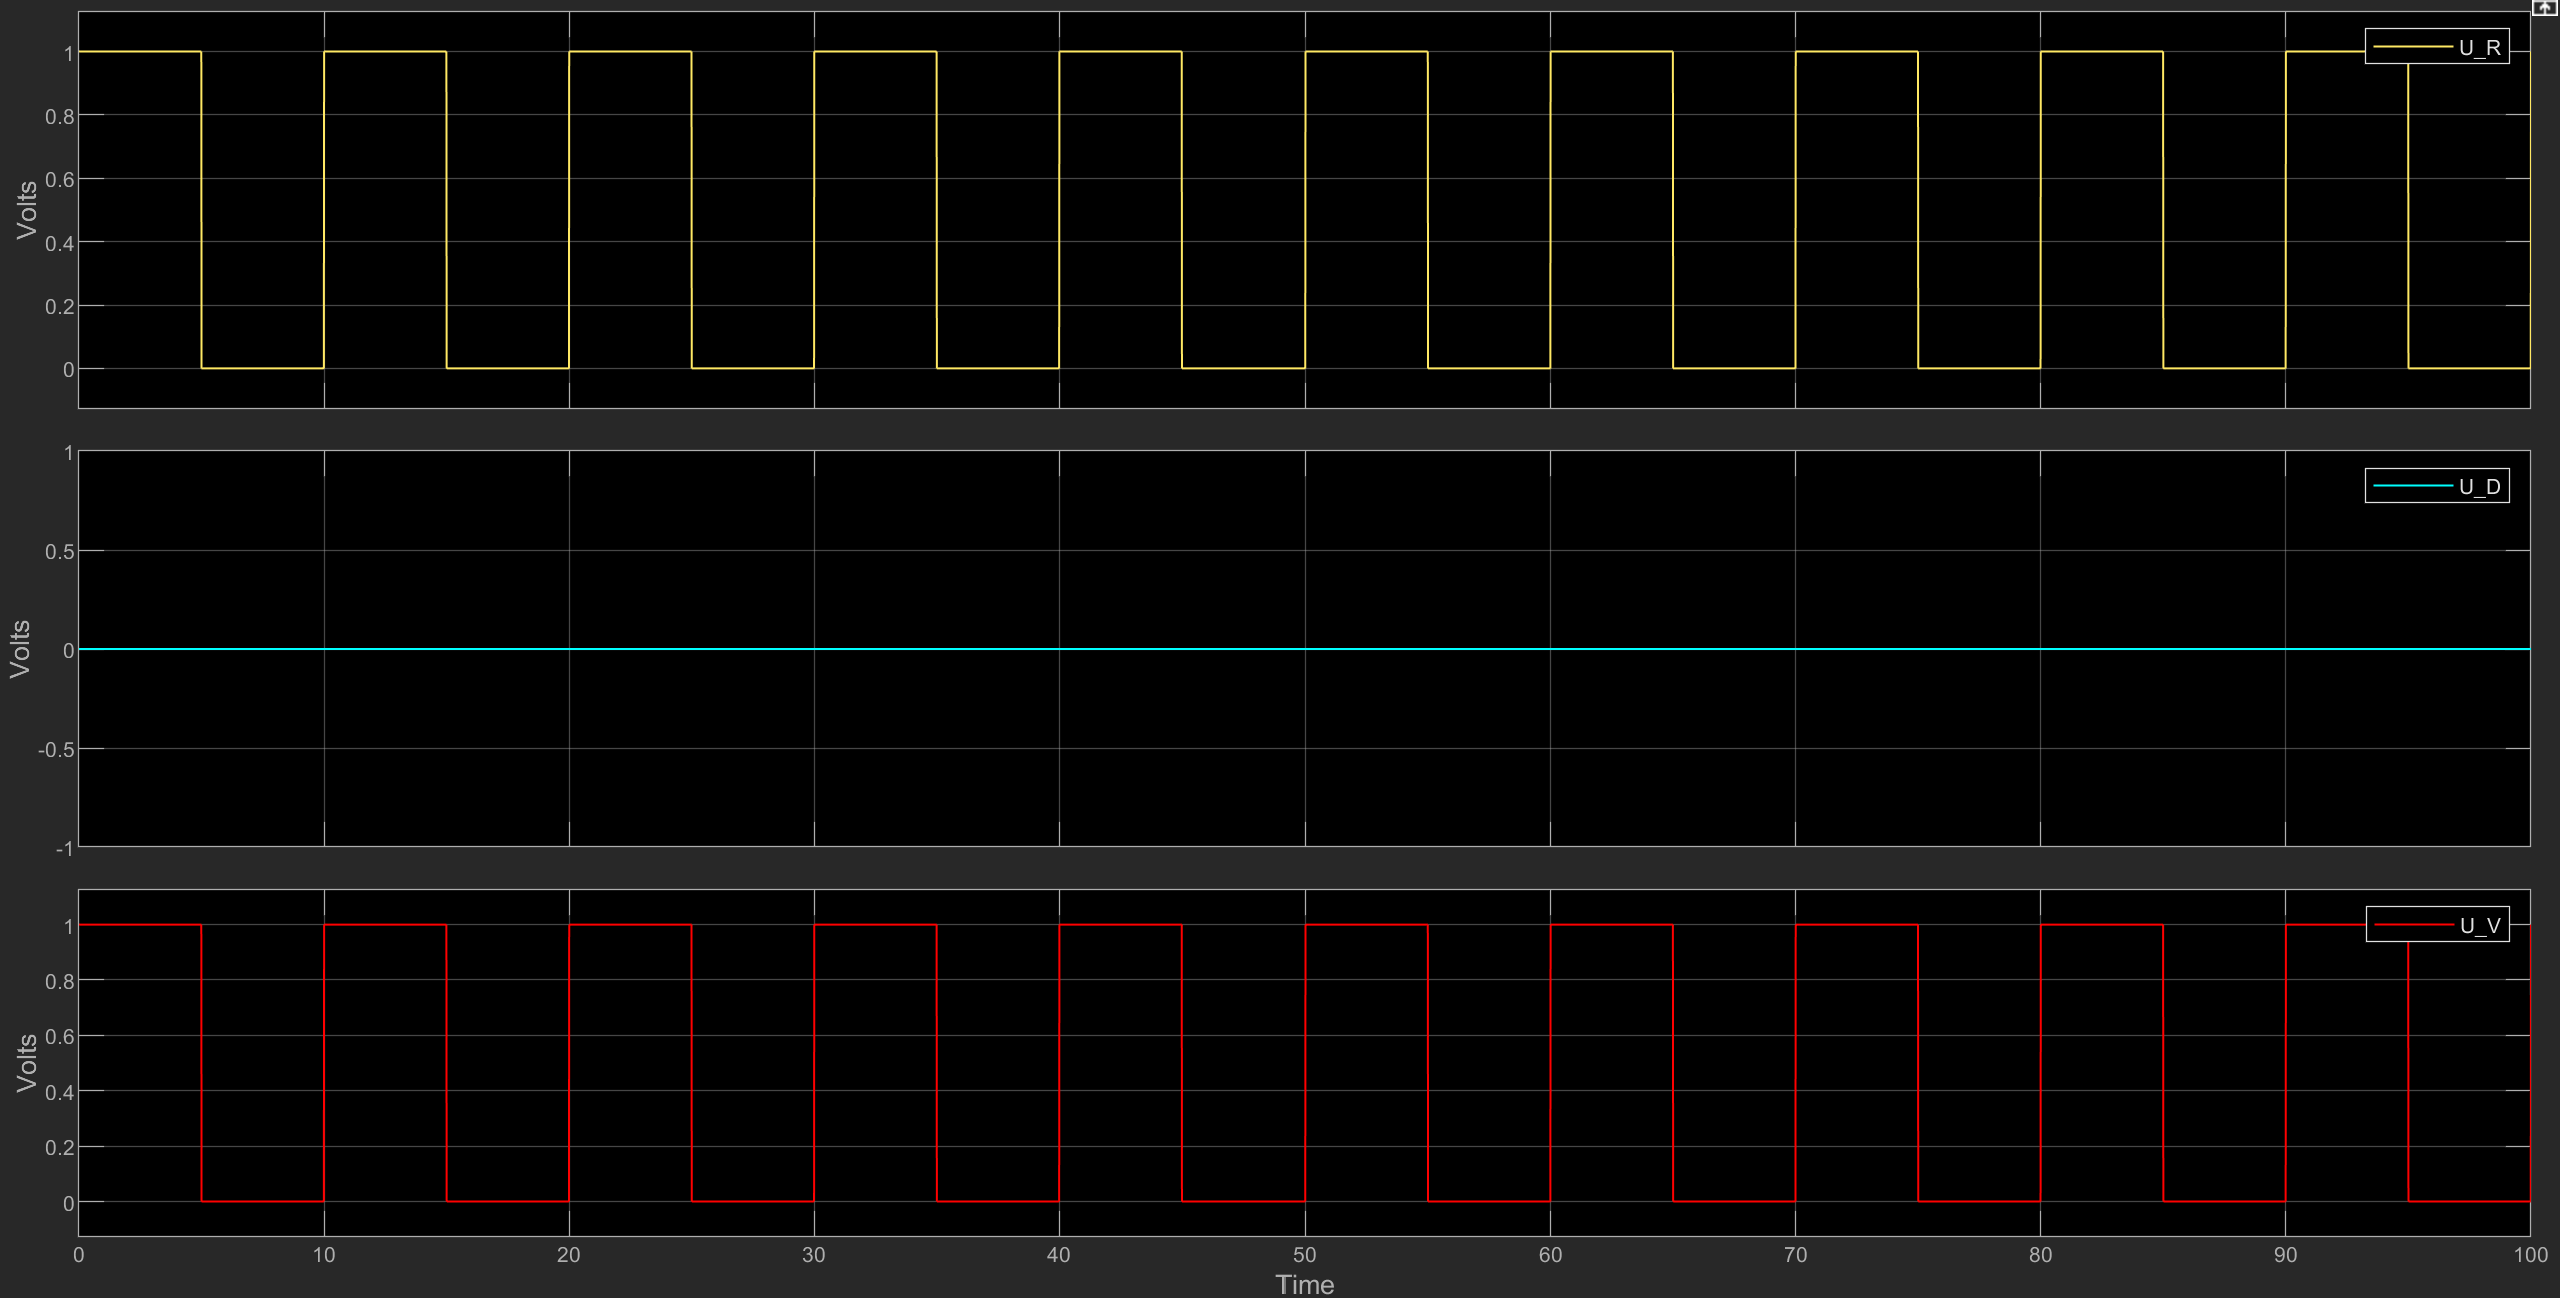

#### 2.- What is the frequency of the output voltage uD(t) compared to the two input signals of the same frequency if there is a phase shift?

As observed in the previous plots, the frequency at the output of the XOR gate is twice the frequency of the input signals.

#### 3.- Determine the time average uF after the control filter for all three cases.

The first step is obtaining the governing equation of the overall circuit. Considering the transfer function of the filter: 

$H(s) = \frac{v_2(t)}{v_1(t)} = \frac{sR_2 C}{s(R_1 C + R_2 C)}$

We obtain:

$v_2(t)= \frac{sR_2 C}{s(R_1 C + R_2 C)}v_1(t)$

Now, using the inverse Laplace transfrom the expression for $v_2(t)$ becomes the output of the following code cell:

In [2]:
import sympy as sp
from sympy import symbols, Function, Eq, inverse_laplace_transform
from IPython.display import display  # ← THIS is the correct display()

# Define symbols
s, t = symbols('s t', real=True)
R1, R2, C = symbols('R1 R2 C', positive=True)
V1 = Function('V1')(s)
v2 = Function('v_2')(t)

# Transfer function
H = (R2*C*s + 1) / ((R1 + R2)*C*s + 1)
V2 = H * V1

# Display full inverse Laplace result
display(Eq(v2, inverse_laplace_transform(V2, s, t)))

Eq(v_2(t), C*R2*Derivative(InverseLaplaceTransform(V1(s)/(C*s*(R1 + R2) + 1), s, t, _None), t) + InverseLaplaceTransform(V1(s)/(C*s*(R1 + R2) + 1), s, t, _None))

Now for solving the equation when the input is a square wave:

In [3]:
# Define symbols
t, s, A, T, D = sp.symbols('t s A T D', positive=True, real=True)
R1, R2, C = sp.symbols('R1 R2 C', positive=True)
v2 = sp.Function('v_2')(t)

# Step 1: Define v1(t) as a single square pulse with duration D*T
v1_t = A * (sp.Heaviside(t) - sp.Heaviside(t - D*T))

# Step 2: Laplace transform of the input
V1s = sp.laplace_transform(v1_t, t, s, noconds=True)

# Step 3: Define the system transfer function H(s)
H = (R2*C*s + 1) / ((R1 + R2)*C*s + 1)

# Step 4: Multiply to get output in Laplace domain
V2s = sp.simplify(H * V1s)

# Step 5: Inverse Laplace transform to get v2(t)
v2_t = sp.simplify(sp.inverse_laplace_transform(V2s, s, t))

# Display the result
display(sp.simplify(sp.Eq(v2, v2_t)))


Eq(v_2(t), A*(-R1*exp(t/(C*(R1 + R2)))*Heaviside(-D*T + t) + R1*exp(t/(C*(R1 + R2))) + R1*exp(D*T/(C*(R1 + R2)))*Heaviside(-D*T + t) - R1 - R2*exp(t/(C*(R1 + R2)))*Heaviside(-D*T + t) + R2*exp(t/(C*(R1 + R2))))*exp(-t/(C*(R1 + R2)))/(R1 + R2))

In [4]:
# Define symbols
t, s, A, T, D = sp.symbols('t s A T D', positive=True, real=True)
R1, R2, C = sp.symbols('R1 R2 C', positive=True)
v2 = sp.Function('v_2')(t)

# Step 1: Define v1(t) as a single square pulse of duration D*T
v1_t = A * (sp.Heaviside(t) - sp.Heaviside(t - D*T))

# Step 2: Laplace transform of v1(t)
V1s = sp.laplace_transform(v1_t, t, s, noconds=True)

# Step 3: Define transfer function of the lag-lead filter
H = (R2*C*s + 1) / ((R1 + R2)*C*s + 1)

# Step 4: Output in Laplace domain
V2s = sp.simplify(H * V1s)

# Step 5: Inverse Laplace to get v2(t)
v2_t = sp.simplify(sp.inverse_laplace_transform(V2s, s, t))

# Step 6: Compute average value over one full period T
v2_avg = sp.simplify(1 / T * sp.integrate(v2_t, (t, 0, T)))

# Step 7: Display the result
display(sp.simplify(sp.Eq(sp.Symbol('v_{2,avg}'), v2_avg)))

Eq(v_{2,avg}, A*(C*R1*(R1 + R2)*(exp(T/(C*(R1 + R2))) - exp(D*T/(C*(R1 + R2))))*Heaviside(T*(1 - D)) - C*R1*(R1 + R2)*exp(T/(C*(R1 + R2))) + C*R1*(R1 + R2) + T*(R1*(D - 1)*Heaviside(T*(1 - D)) + R1 + R2*(D - 1)*Heaviside(T*(1 - D)) + R2)*exp(T/(C*(R1 + R2))))*exp(-T/(C*(R1 + R2)))/(T*(R1 + R2)))

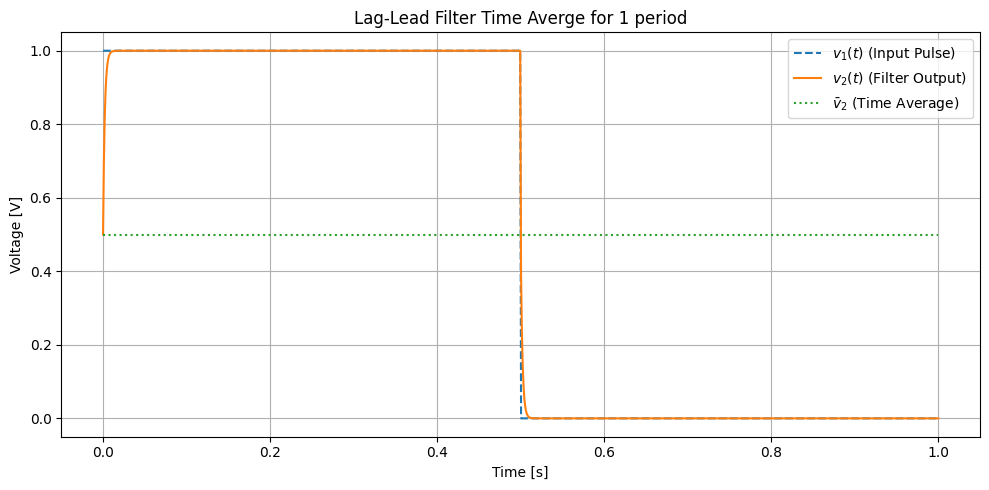

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define symbols
t, s, A, T, D = sp.symbols('t s A T D', real=True, positive=True)
R1, R2, C = sp.symbols('R1 R2 C', positive=True)
v2 = sp.Function('v_2')(t)

# Step 2: Define v1(t): square pulse from 0 to D*T
v1_expr = A * (sp.Heaviside(t) - sp.Heaviside(t - D*T))

# Step 3: Laplace transform of v1(t)
V1s = sp.laplace_transform(v1_expr, t, s, noconds=True)

# Step 4: Transfer function H(s)
H = (R2*C*s + 1) / ((R1 + R2)*C*s + 1)

# Step 5: V2(s) and inverse Laplace
V2s = sp.simplify(H * V1s)
v2_expr = sp.simplify(sp.inverse_laplace_transform(V2s, s, t))

# Step 6: Average value over one period
v2_avg_expr = sp.simplify(1 / T * sp.integrate(v2_expr, (t, 0, T)))

# Step 7: Substitute numerical values
values = {
    A: 1,
    T: 1,
    D: 0.5,
    R1: 1e3,
    R2: 1e3,
    C: 1e-6
}

v1_expr_num = v1_expr.subs(values)
v2_expr_num = v2_expr.subs(values)
v2_avg_val = float(v2_avg_expr.subs(values))

# Step 8: Lambdify with explicit vector handling
heaviside = lambda x: np.heaviside(x, 1)
v1_func = sp.lambdify(t, v1_expr_num, modules=["numpy", {"Heaviside": heaviside}])
v2_func = sp.lambdify(t, v2_expr_num, modules=["numpy", {"Heaviside": heaviside}])

# Step 9: Evaluate and plot
t_vals = np.linspace(0, float(values[T]), 1000)
v1_vals = np.array([v1_func(ti) for ti in t_vals])
v2_vals = np.array([v2_func(ti) for ti in t_vals])
v2_avg_line = np.full_like(t_vals, v2_avg_val)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t_vals, v1_vals, '--', label=r'$v_1(t)$ (Input Pulse)')
plt.plot(t_vals, v2_vals, label=r'$v_2(t)$ (Filter Output)')
plt.plot(t_vals, v2_avg_line, ':', label=r'$\bar{v}_2$ (Time Average)')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Lag-Lead Filter Time Averge for 1 period')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### 4.- Plot uF(Φ) versus the phase shift Φ = ϕR−ϕV for −180◦ ≤ Φ ≤ 180◦.

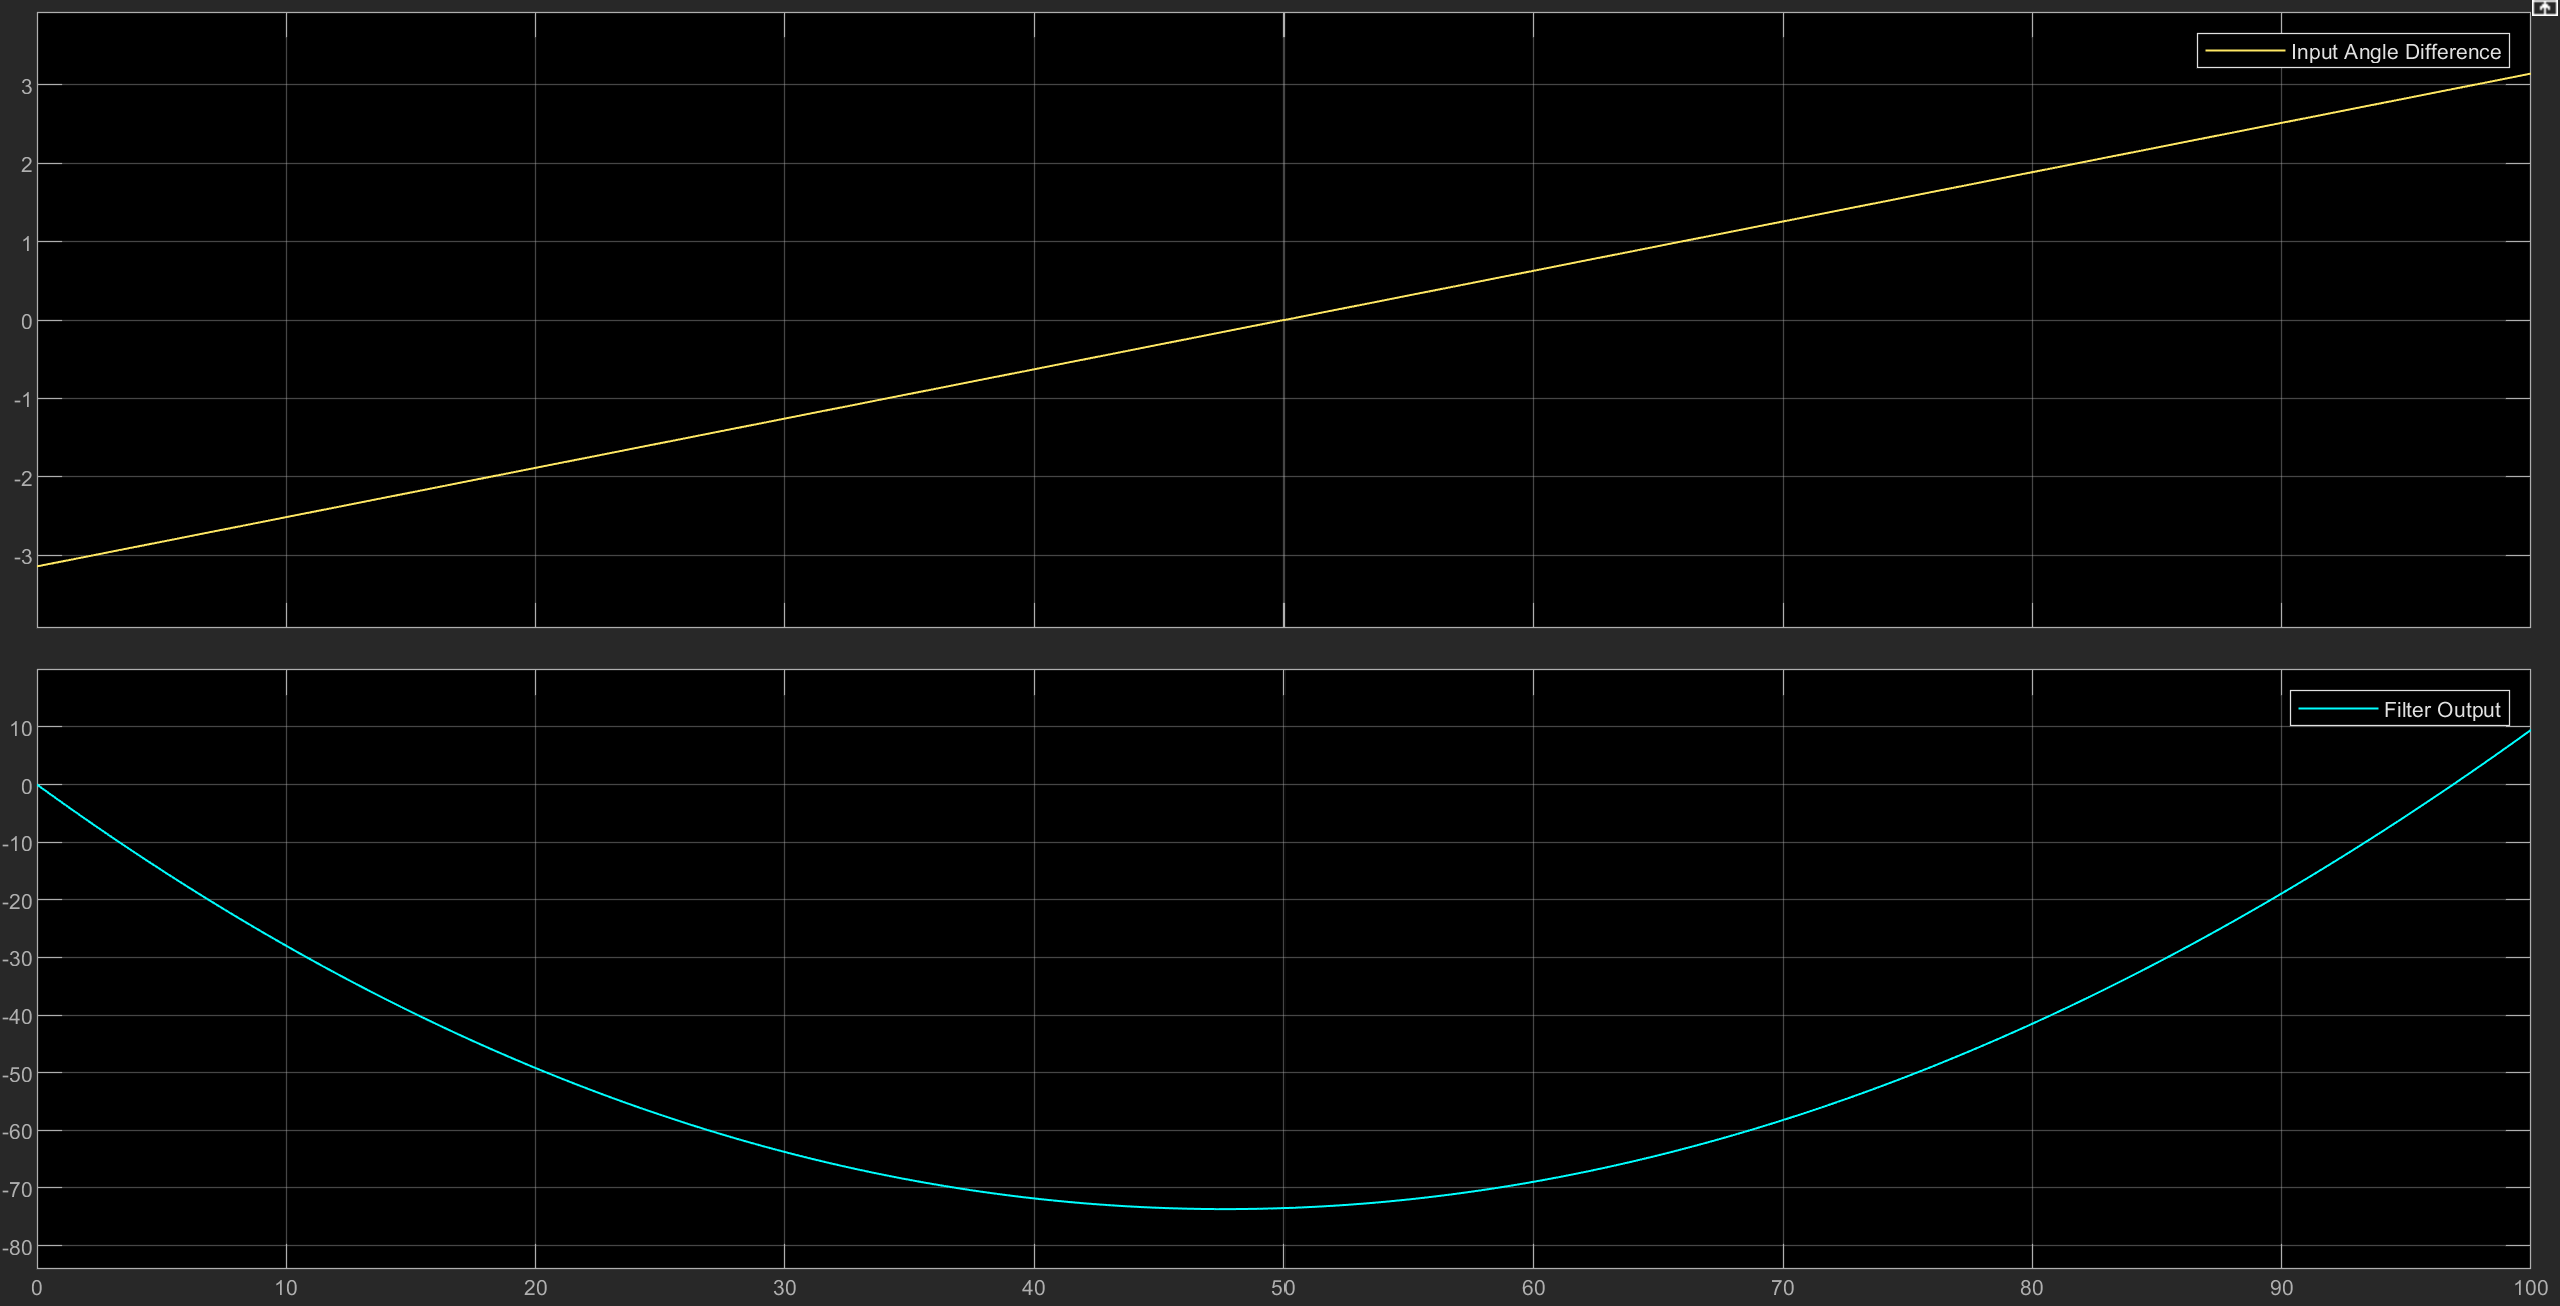

In [ ]:
import numpy as np

### 2.2.2 Phase-frequency detector

In digital technology, the phase detector can be implemented by an XOR circuit, such as in
the case of NXP’s HEF4046BT PLL IC from the first experiment portion.

#### 1.- Draw starting from two equal-frequency, phase-shifted square-wave signals uR(t) and uV(t), plot the output voltage of the phase detector uD(t) at a phase shift of Φ = ϕR−ϕV = 0◦, 90◦, -90◦.

To generate the plots, the digital circuits where simulated in Simulink. The plot for the D Flip Flop output where there is no phase difference is:

![FF_1.png](attachment:XOR_1.png)

The plot for the D Flip Flop output where there is a 90º phase difference is:

![FF_2.png](attachment:XOR_1.png)

The plot for the D Flip Flop output where there is a -90º phase difference is:

![FF_3.png](attachment:XOR_1.png)

#### 2.- Again determine the time average uF after the control filter for all three cases.

The first step is obtaining the governing equation of the overall circuit. Considering the transfer function of the filter: 

$H(s) = \frac{v_2(t)}{v_1(t)} = \frac{sR_2 C}{s(R_1 C + R_2 C)}$

We obtain:

$v_2(t)= \frac{sR_2 C}{s(R_1 C + R_2 C)}v_1(t)$

Now, using the inverse Laplace transfrom the expression for $v_2(t)$ becomes the output of the following code cell:

#### 3.- Again plot uF(Φ) versus the phase shift Φ = ϕR−ϕV for −180◦ ≤ Φ ≤ 180◦.

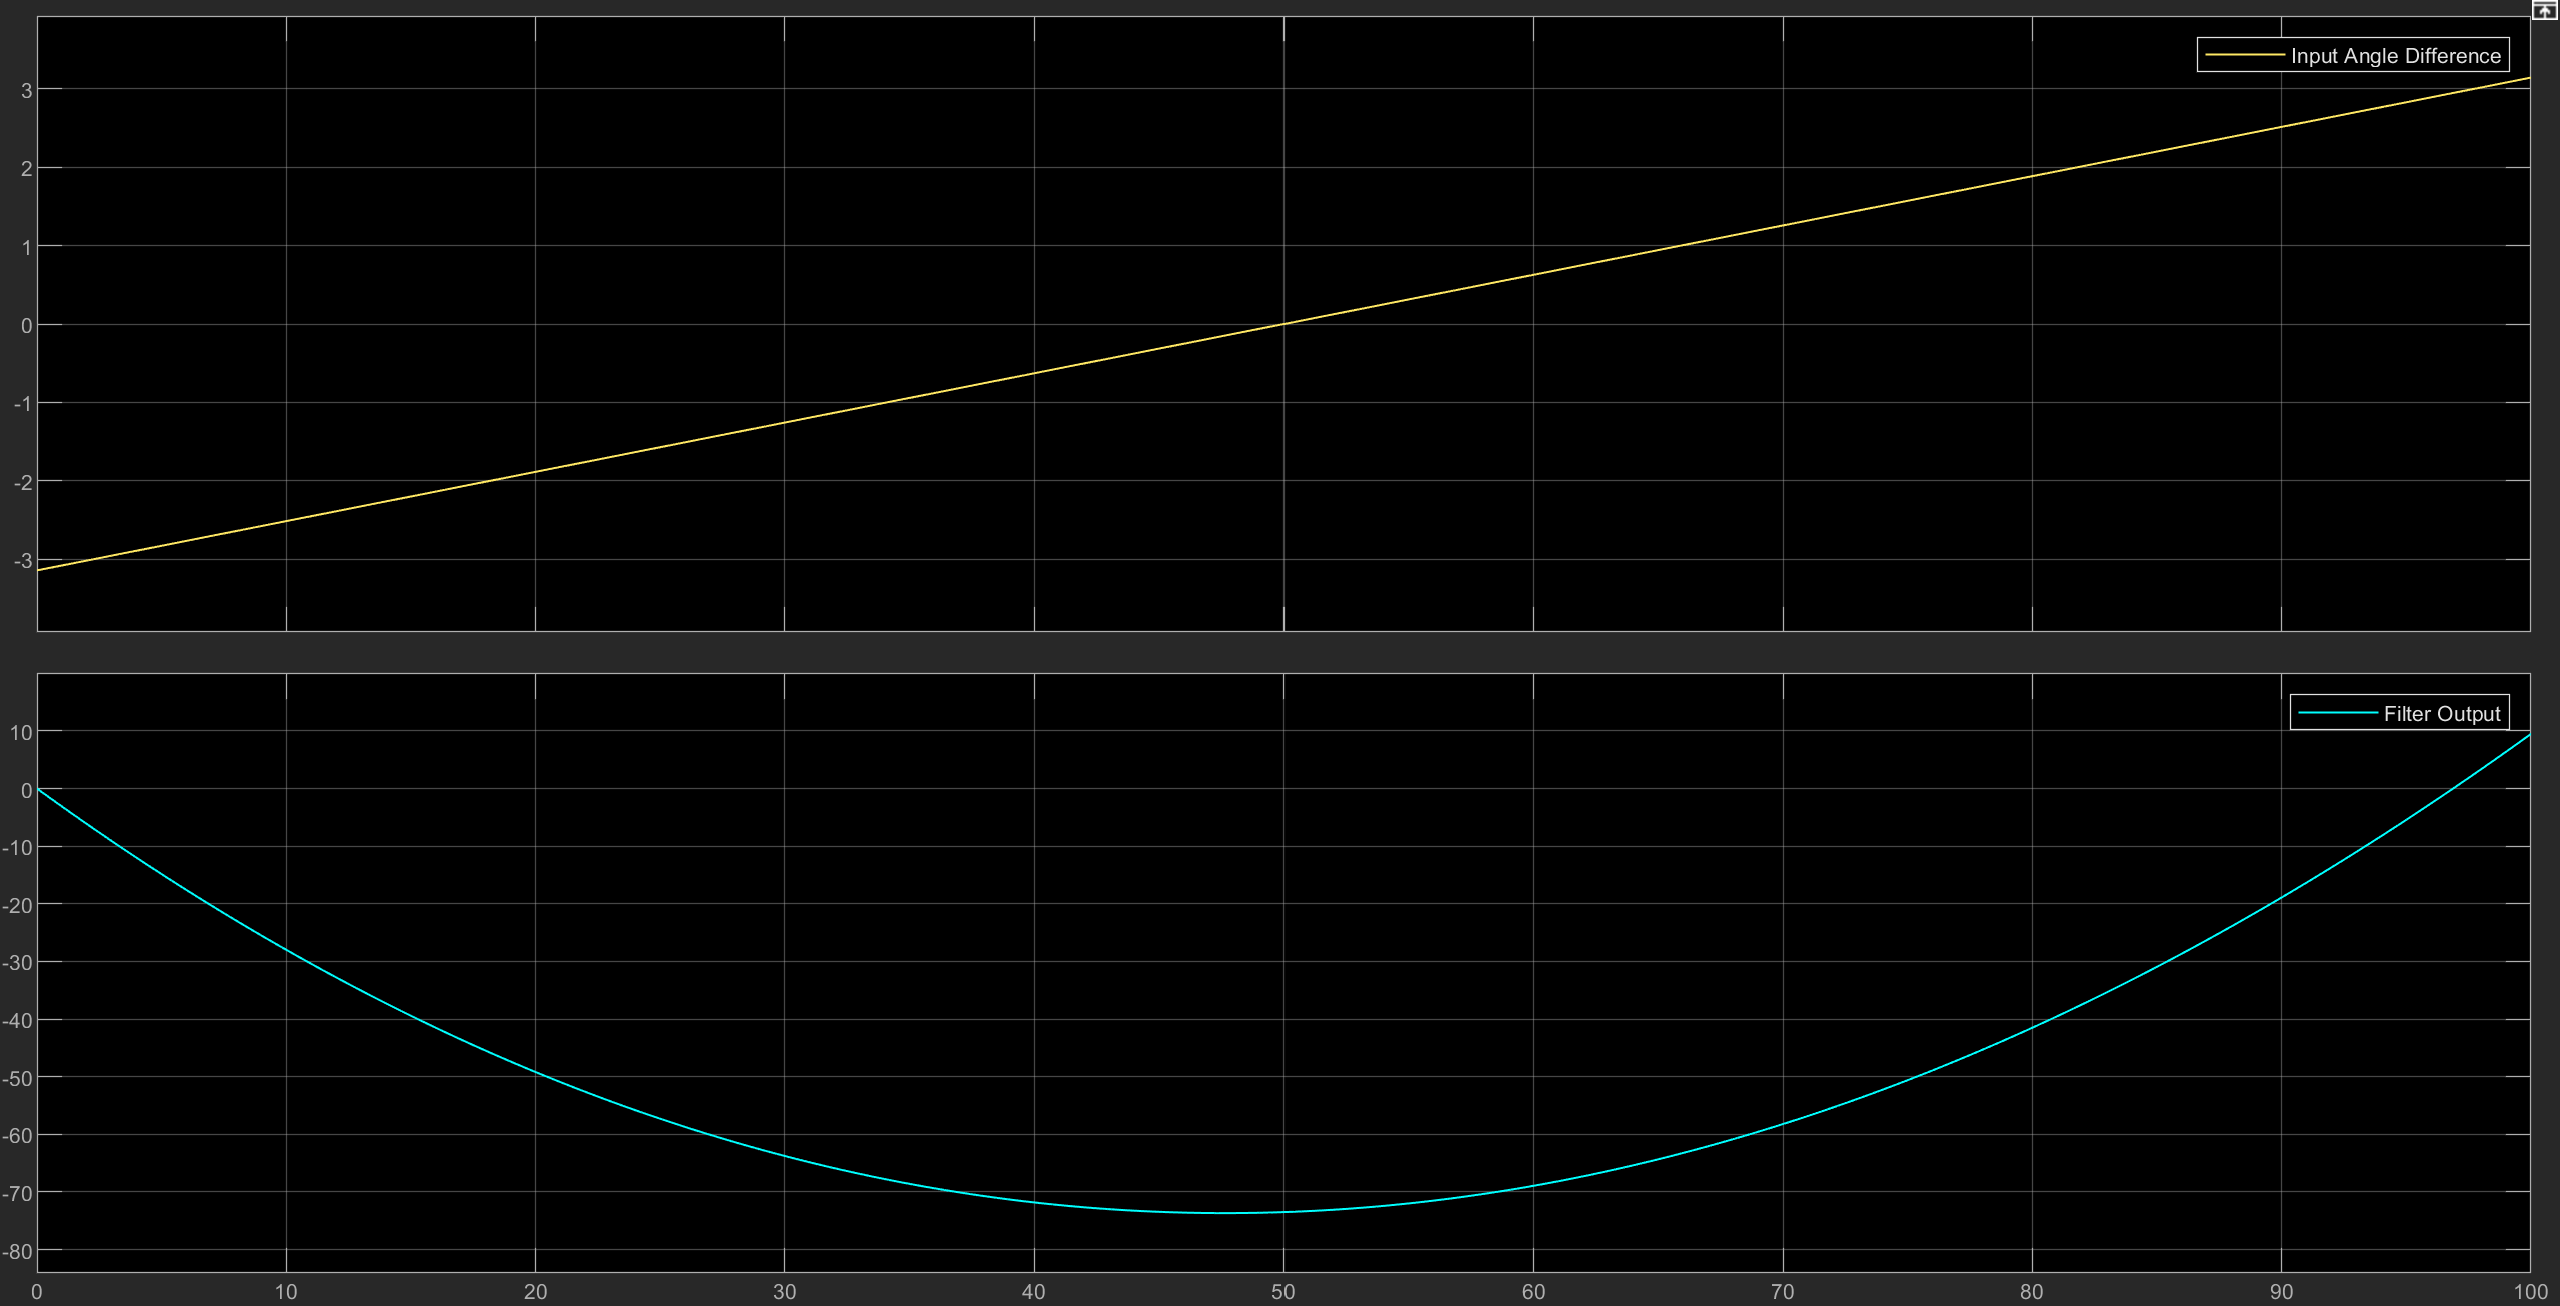

#### 4.- What is the advantage of the phase-frequency detector over the XOR circuit?

MISSSSSSING

## 2.3. Circuit of the VCO in the HEF4046BT

For solving the exercise we used the following
[HEF4046BT datasheet](https://assets.nexperia.com/documents/data-sheet/HEF4046B.pdf) (last accessed on 10. May)

### 2.3.1 What is the purpose of $R_1$, $R_2$ and $C_1$ ?

According to the datasheet $R_1$, $R_2$ and $C_1$ are connected to the pins 11, 12 and for $C_1$ its across 6 and 7. <br>
$R_1$ and $C_1$ determine the frequency range of the VCO and $R_2$ can be used to set a frequency offset. <br>
The recommended range for the $R_1$ and $R_2$: $10k\Omega \leq R \leq 1M\Omega$. <br>
For the capacitor: $50pF \leq C$

### 2.3.2 Determine $R_1$ and $C_1$ for max. operating range between $50kHz$ and $200kHz$

Given values: <br>
- $R_2 = 100k\Omega$
- $V_{DD} = 5V$ <br>

Taking Fig.7 from the datasheet to determine $C_1$. <br>
Using Line 6 as it calculated with the given values, we get for $f_{min}=50kHz$ a value of $C_1 = 15 \cdot 10^3 \cdot 10^{-12}F = 15nF$. The screenshot is below. <br>
For determining the $R_1$ value, we take Fig. 8 and calculate the ratio $\frac{f_{max}}{f_min} = \frac{200kHz}{50kHz} = 4 $. <br>
From the grap we get for the ratio $\frac{R_2}{R_1} = 4$. So $R_1 = 24k\Omega$. The screenshot is also below. <br>
![title](f_min_c2.png) <br>
![title](r2_r1_bw.png) <br>

## 2.4. Frequency divider of the ADF 4113

For solving the exercise we used the following
[ADF4113 datasheet](https://www.analog.com/media/en/technical-documentation/data-sheets/ADF4110_4111_4112_4113.pdf) (last accessed on 10. May)

### 2.4.1 How must the divider ratio $n$ be chosen if $1.7GHz$, $1.75GHz$ and $1.8 GHz$ are to be output?

In [ ]:
f_ref = 10e6
f = np.array([1.7e9, 1.75e9, 1.8e9])

n = np.divide(f, f_ref)
print(f"The divider ratios are: {n}")

The divider ratios are: [170. 175. 180.]


### 2.4.2 Can $1.755GHz$ also be realized? What divider ratios must / would then be used and how long must / would they be applied in relation to each other?

Yes, with fractional-N dividers, it is possible to achieve higher frequency resolution than with only integer-N PLLs. 
These dividers allow the division ratio to be a fractional number, not just an integer. 
Instead of using a fixed divider N, the system rapidly alternates between two integer divider values, N and N+1, for short periods of time.
The effective division factor (n_eff) is then the time-weighted average of the two dividers:

$$
n_{\text{eff}} = n + \frac{T_{n+1}}{T_n + T_{n+1}}
$$    

To realize the 1.755 GHz the devicer ratios can be calculated as the follwing.

In [ ]:
def calc_neff(n: int, Tn: float, Tn1: float) -> float:
    """
    Calculate the effective divider ratio for a fractional-N PLL.

    Args:
        n (int): Base divider value (integer part).
        Tn (float): Time duration using divider n.
        Tn1 (float): Time duration using divider n+1.

    Returns:
        float: Effective divider value n_eff.
    """
    n_eff = n + Tn1 / (Tn + Tn1)
    return n_eff

def calc_feff(n: int, Tn: float, Tn1: float) -> float:
    """
    Calculate the effective frequency at the output of the VCO
    
    Args: 
        n (int): Base divider value (integer part).
        Tn (float): Time duration using divider n.
        Tn1 (float): Time duration using divider n+1.
    """
    f_eff = (n * Tn + (n+1) * Tn1) * 10e6 
    return f_eff

# Target: n_eff = 175.5
n = 175
Tn1 = 0.5  # Time at n+1
Tn = 0.5   # Time at n

n_eff = calc_neff(n, Tn, Tn1)
print(f"Effective divider n_eff = {n_eff}")
f_eff = calc_feff(n, Tn, Tn1) / 1e6
print(f"Effective output frequency = 175.5 x 10 MHz = {f_eff:.1f} Mhz")

Effective divider n_eff = 175.5
Effective output frequency = 175.5 x 10 MHz = 1755.0 Mhz


The resulting devider rations are 175 and 176 with duty cycles of 50%.

### 2.4.3 What are / would be the values at 1.752 GHz?

The effective necessary division radtio is 1752 MHz / 10 MHz = 157.2
To calculate the time duratio for each division rate, we use the functions from above.

In [ ]:
n = 175
Tn1 = 0.2
Tn = 0.8
n_eff = calc_neff(n, Tn, Tn1)
print(f"Effective divider n_eff = {n_eff}")
f_eff = calc_feff(n, Tn, Tn1) / 1000000
print(f"Effective output frequency = 175.5 x 10 MHz = {f_eff:.1f} Mhz")

Effective divider n_eff = 175.2
Effective output frequency = 175.5 x 10 MHz = 1752.0 Mhz


To reach the 1.752 GHz, the dividor ratios are 175 and 176 with a duty cycle of 20% for 175.